# importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import datetime

# importing dataset

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.drop("ID",axis=1,inplace=True)
test.drop("ID",axis=1,inplace=True)

# Data analysis using plots

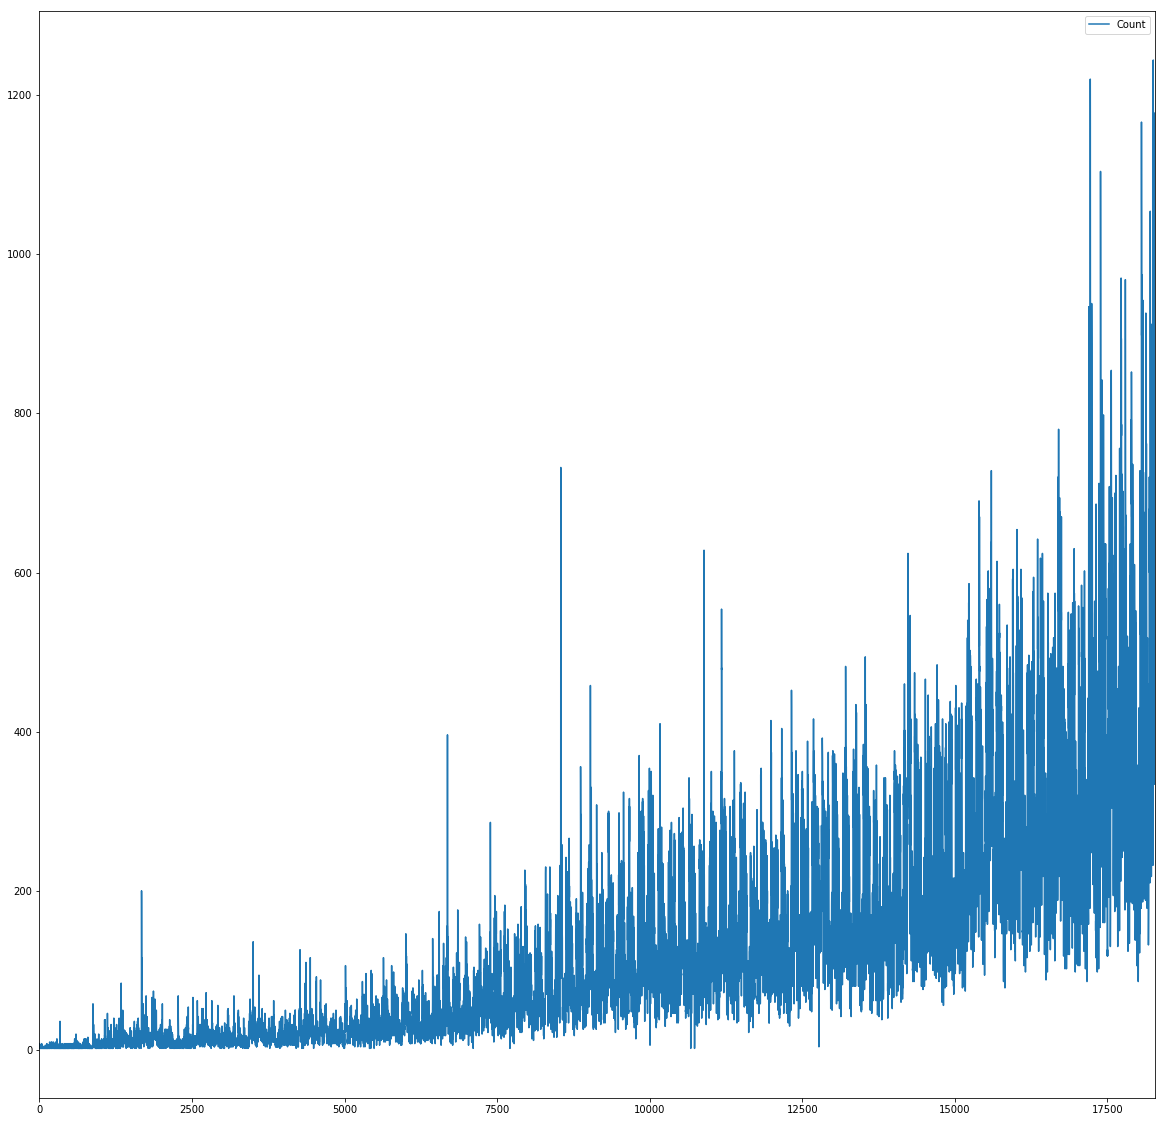

In [4]:
train.plot(figsize=(20,20))

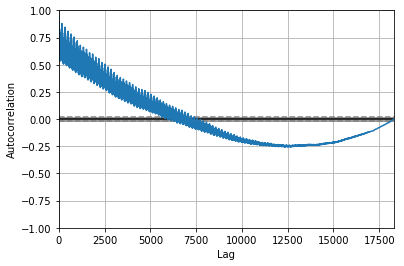

In [5]:
autocorrelation_plot(train["Count"])

## As the lag is very high and general upward trend and seasonality can be found, rather than using AutoRegressive Integrated Moving Averages,I would give preference to RandomForestRegressor which takes care of all these aspects instead of feature tuning ARIMA

# Data Preprocessing

In [6]:
train.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [7]:
for index,row in train.iterrows():
    train.at[index,"Datetime"]=datetime.datetime.strptime(row["Datetime"], '%d-%m-%Y %H:%M')

In [8]:
train.dtypes

Datetime    object
Count        int64
dtype: object

# After setting datetime as index, there was a observation that there are no missing dates

In [9]:
for index,row in train.iterrows():
    train.at[index,"day"]=row["Datetime"].date().day
    train.at[index,"month"]=row["Datetime"].date().month
    train.at[index,"year"]=row["Datetime"].date().year
    train.at[index,"hours"]=row["Datetime"].time().hour

In [10]:
train.head()

,Datetime,Count,day,month,year,hours
0,2012-08-25 00:00:00,8,25.0,8.0,2012.0,0.0
1,2012-08-25 01:00:00,2,25.0,8.0,2012.0,1.0
2,2012-08-25 02:00:00,6,25.0,8.0,2012.0,2.0
3,2012-08-25 03:00:00,2,25.0,8.0,2012.0,3.0
4,2012-08-25 04:00:00,2,25.0,8.0,2012.0,4.0


In [11]:
train.drop("Datetime",inplace=True,axis=1)

# Forecasting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
target=train["Count"]
train.drop("Count",axis=1,inplace=True)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# first method of forecasting normally used in production

In [15]:
train_x,test_x,train_y,test_y=train_test_split(train,target,shuffle=False,test_size=0.1)

In [16]:
model=RandomForestRegressor()

In [17]:
model.fit(train_x,train_y)

/home/sirzechlucifer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
prediction=model.predict(test_x)

In [19]:
mean_absolute_error(test_y,prediction)

137.1359212684527

# Ideal method of forecasting but not viable in production(using new data as an when it is coming in)

In [20]:
train_x,test_x,train_y,test_y=train_test_split(train,target,shuffle=False,test_size=0.0001)

In [21]:
test_x.shape

(2, 4)

In [22]:
model=RandomForestRegressor()

In [23]:
model.fit(train_x,train_y)

/home/sirzechlucifer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
prediction=model.predict(test_x)

In [25]:
mean_absolute_error(test_y,prediction)

145.0

## in this method as the new data comes in and is retrained with the model, the error keeps on decreasing

## one problem with RF is that, it does not work well with data outside the trend observed in the dataset

## VAR and other Univariate time series methods require excessive parameter tuning for handling the seasonality,trend which can be done by setting the parameters according to the flattening coefficient for the noise and other aspects